# Initial Findings Udemy Courses

In this first section, we analyze Udemy courses using datasets provided by Chase Willden on [data.world](https://data.world/chasewillden) according to four different categories of courses:  
- Web Development
- Graphic Design
- Music Instruments
- Business Finance
 
## Preprocessing

Importing basic packages:

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_WebDev = pd.read_csv('../Data/raw/WebDevelopment.csv')
df_GraphDesig = pd.read_csv('../Data/raw/GraphicDesign.csv')
df_MusicInstr = pd.read_csv('../Data/raw/MusicInstraments.csv')
df_BussFinan = pd.read_csv('../Data/raw/BusinessFinance.csv')

Drop unknown columns: `Unnamed: 11`, `Unnamed: 12`:

In [3]:
df_WebDev.dropna(axis=1, how='all', inplace=True)
df_GraphDesig.dropna(axis=1, how='all', inplace=True)
df_MusicInstr.dropna(axis=1, how='all', inplace=True)
df_BussFinan.dropna(axis=1, how='all', inplace=True)

Inserting `category` column:

In [4]:
df_WebDev['category'] = 'WebDevelopment'
df_GraphDesig['category'] = 'GraphicDesign'
df_MusicInstr['category'] = 'MusicInstrument'
df_BussFinan['category'] = 'BussinessFinance'

In [5]:
df_courses = pd.concat([df_WebDev, df_GraphDesig, df_MusicInstr, df_BussFinan], ignore_index=True, sort=False)

Quick inspection:

In [6]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 16 columns):
id                      3683 non-null int64
title                   3683 non-null object
url                     3683 non-null object
isPaid                  3683 non-null object
price                   3683 non-null object
numSubscribers          3683 non-null int64
numReviews              3683 non-null int64
numPublishedLectures    3683 non-null int64
instructionalLevel      3683 non-null object
contentInfo             3683 non-null object
publishedTime           3683 non-null object
Is Paid                 8 non-null object
Total                   8 non-null float64
Percent                 4 non-null object
category                3683 non-null object
Column1                 5 non-null object
dtypes: float64(1), int64(4), object(11)
memory usage: 460.5+ KB


Drop columns with any misssing value:

In [7]:
df_courses.dropna(axis=1, how='any', inplace=True)

In [8]:
df_courses.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,category
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,WebDevelopment
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,WebDevelopment
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,WebDevelopment
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,WebDevelopment
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,WebDevelopment


- Convert price and contentInfo to float
- Convert published time to datetime

In [9]:
def price_to_float(price):
    try:
        priceFloat = float(price)
    except:
        priceFloat = 0.0
        
    return priceFloat

In [10]:
df_courses['price'] = df_courses.price.apply(price_to_float)

In [11]:
def time_spent(contentInfo):
    if re.search('hour', contentInfo):
        time = float(contentInfo.split()[0])
    elif re.search('minute', contentInfo):
        time = float(contentInfo.split()[0])/60
    else:
        time = np.nan
    return time

In [12]:
df_courses['timeSpent'] = df_courses.contentInfo.apply(time_spent) 

In [13]:
def edit_datetime(publishedTime):
    try:
        dt = datetime.strptime(publishedTime, '%Y-%m-%dT%H:%M:%SZ') 
        time = dt.strftime("%Y-%m-%d")
        time = datetime.strptime(time, '%Y-%m-%d').date()
    except:
        time = np.nan
        
    return time

In [14]:
df_courses['publishDate'] = df_courses.publishedTime.apply(edit_datetime)

In [15]:
def instructionLevel(instructionLevel):
    if instructionLevel.isnumeric():
        level = np.nan
    else: 
        level = instructionLevel
        
    return level

In [16]:
df_courses['level'] = df_courses.instructionalLevel.apply(instructionLevel)

In [17]:
def isPaid(isPaid):
    if isinstance(isPaid, bool): 
        return isPaid
    elif isinstance(isPaid, str):
        if isPaid ==  'TRUE':
            return True
        else:
            return False
    else:
        return np.nan

In [18]:
df_courses['paidBool'] = df_courses.isPaid.apply(isPaid)

In [19]:
df_courses.head(2)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,category,timeSpent,publishDate,level,paidBool
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,WebDevelopment,4.0,2013-01-03,All Levels,True
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50.0,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,WebDevelopment,12.5,2012-06-18,All Levels,True


## Initial Findings

Number of courses per category:

In [20]:
df_courses.groupby('category').count().id

category
BussinessFinance    1199
GraphicDesign        603
MusicInstrument      681
WebDevelopment      1200
Name: id, dtype: int64

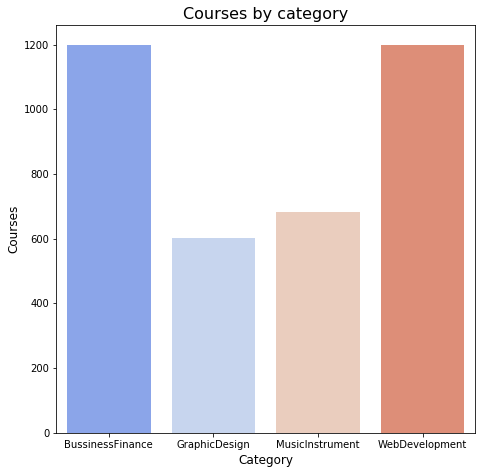

In [21]:
total_courses = df_courses.groupby('category').count().id

_ = plt.figure(figsize=(7.5, 7.5))
_ = sns.barplot(x=total_courses.index, y=total_courses, palette='coolwarm')
_ = plt.xlabel('Category', size=12)
_ = plt.ylabel('Courses', size=12)
_ = plt.title('Courses by category', size=16)

Average course price in every category:

In [22]:
df_courses.groupby(['category']).price.mean()

category
BussinessFinance    68.423686
GraphicDesign       57.827529
MusicInstrument     49.486050
WebDevelopment      77.033333
Name: price, dtype: float64

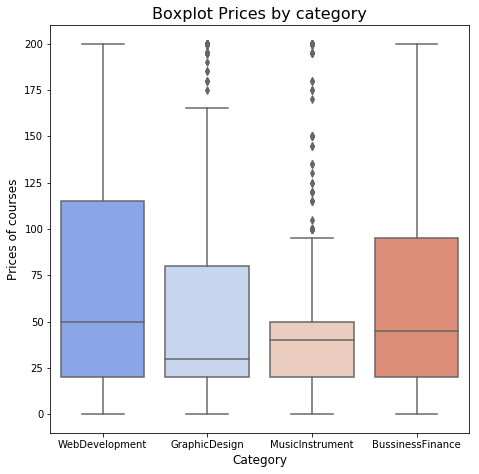

In [23]:
_ = plt.figure(figsize=(7.5, 7.5))
_ = sns.boxplot(x='category', y='price', data=df_courses, palette='coolwarm')
_ = plt.xlabel('Category', size=12)
_ = plt.ylabel('Prices of courses', size=12)
_ = plt.title('Boxplot Prices by category', size=16)

Time spent by category:

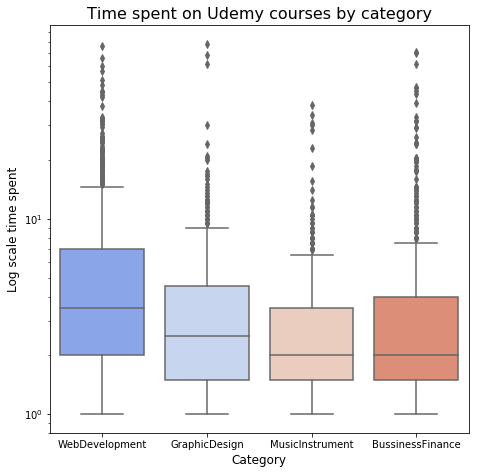

In [24]:
_ = plt.figure(figsize=(7.5, 7.5))
_ = plt.yscale('log')
_ = sns.boxplot(x='category', y='timeSpent', data=df_courses, palette='coolwarm')
_ = plt.xlabel('Category', size=12)
_ = plt.ylabel('Log scale time spent', size=12)
_ = plt.title('Time spent on Udemy courses by category', size=16)

In [25]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 16 columns):
id                      3683 non-null int64
title                   3683 non-null object
url                     3683 non-null object
isPaid                  3683 non-null object
price                   3683 non-null float64
numSubscribers          3683 non-null int64
numReviews              3683 non-null int64
numPublishedLectures    3683 non-null int64
instructionalLevel      3683 non-null object
contentInfo             3683 non-null object
publishedTime           3683 non-null object
category                3683 non-null object
timeSpent               3351 non-null float64
publishDate             3682 non-null object
level                   3682 non-null object
paidBool                3683 non-null bool
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 435.3+ KB


In [26]:
df_courses.dropna(inplace=True)

In [27]:
df_courses.to_csv('../Data/interim/Courses.csv', index=False)

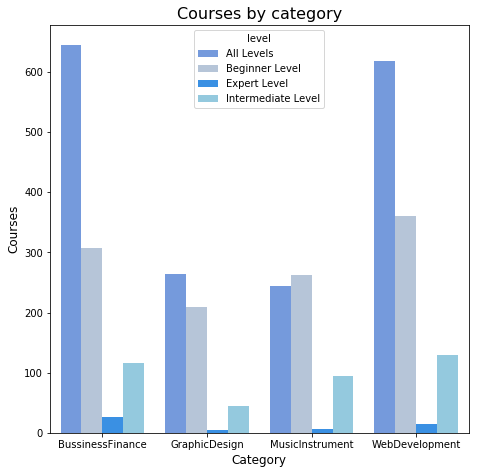

In [28]:
instructionLevel = df_courses.groupby(['category', 'level']).count()
instructionLevel.reset_index(inplace=True)

_ = plt.figure(figsize=(7.5, 7.5))
_ = sns.barplot(x='category', y='id', hue='level', 
                palette=['cornflowerblue', 'lightsteelblue', 'dodgerblue',  'skyblue'], 
                data=instructionLevel)
_ = plt.xlabel('Category', size=12)
_ = plt.ylabel('Courses', size=12)
_ = plt.title('Courses by category', size=16)

In [29]:
paidLevel = df_courses.groupby(['category', 'paidBool', 'level']).count()
paidLevel.reset_index(inplace=True)

businessFinance = paidLevel[paidLevel.category == 'BussinessFinance']
graphicDesign = paidLevel[paidLevel.category == 'GraphicDesign']
musicInstrument = paidLevel[paidLevel.category == 'MusicInstrument']
webDevelopment = paidLevel[paidLevel.category == 'WebDevelopment']

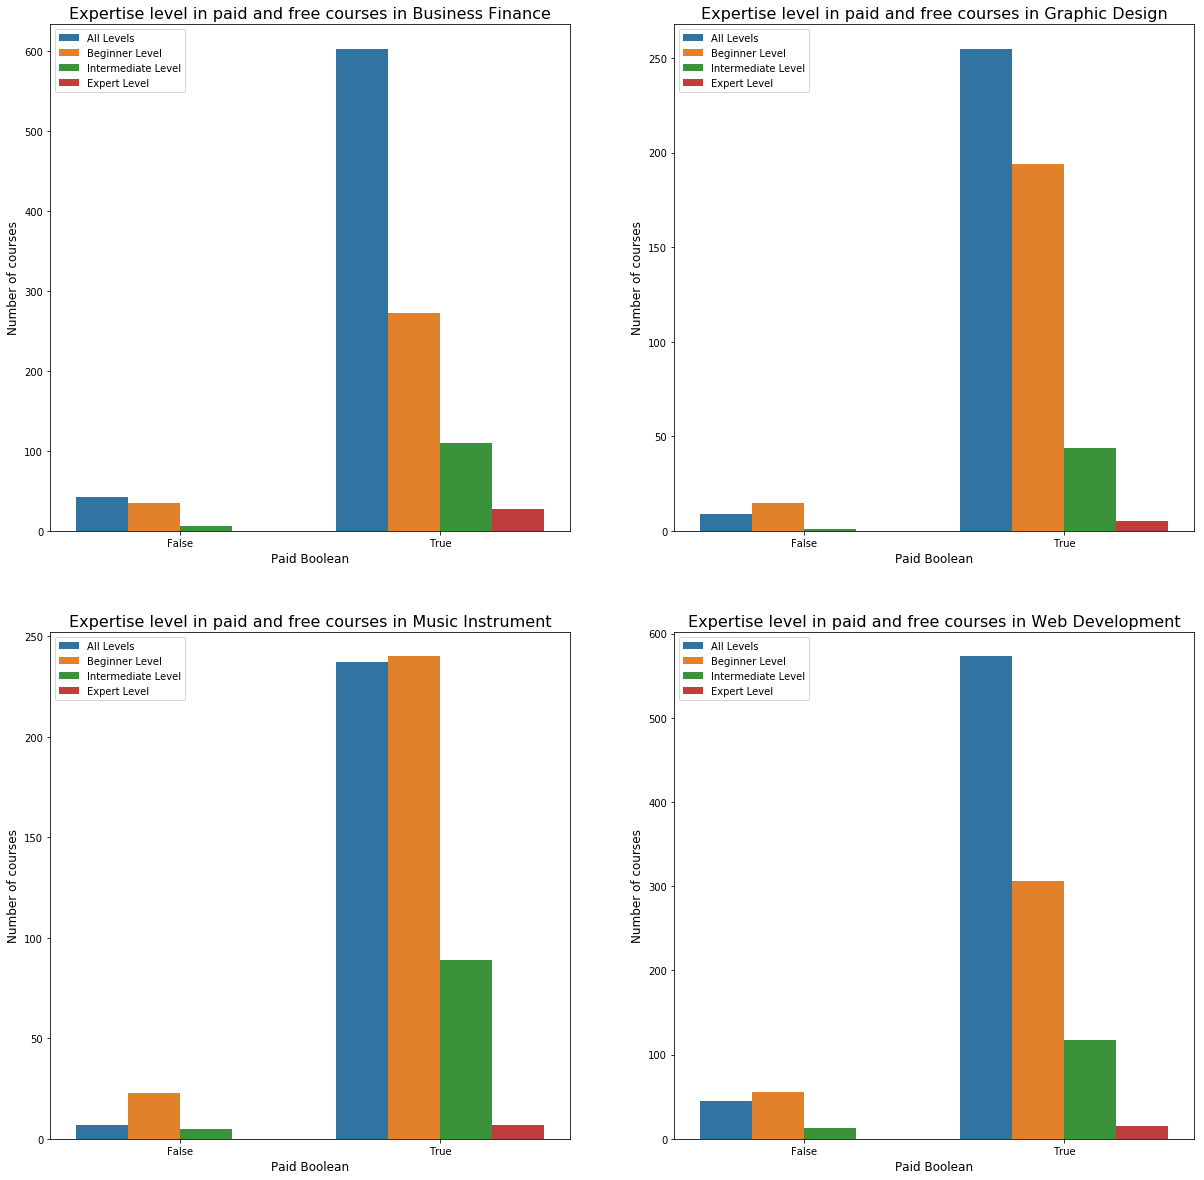

In [30]:
_ = plt.figure(figsize=(20.5, 20.5))

_ = plt.subplot(221)
_ = sns.barplot(x='paidBool', y='id', hue='level', 
                data=businessFinance)
_ = plt.xlabel('Paid Boolean', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Expertise level in paid and free courses in Business Finance', size=16)
_ = plt.legend(loc='upper left')



_ = plt.subplot(222)
_ = sns.barplot(x='paidBool', y='id', hue='level', 
                data=graphicDesign)
_ = plt.xlabel('Paid Boolean', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Expertise level in paid and free courses in Graphic Design', size=16)
_ = plt.legend(loc='upper left')

_ = plt.subplot(223)
_ = sns.barplot(x='paidBool', y='id', hue='level', 
                data=musicInstrument)
_ = plt.xlabel('Paid Boolean', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Expertise level in paid and free courses in Music Instrument', size=16)
_ = plt.legend(loc='upper left')


_ = plt.subplot(224)
_ = sns.barplot(x='paidBool', y='id', hue='level', 
                data=webDevelopment)
_ = plt.xlabel('Paid Boolean', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Expertise level in paid and free courses in Web Development', size=16)
_ = plt.legend(loc='upper left')

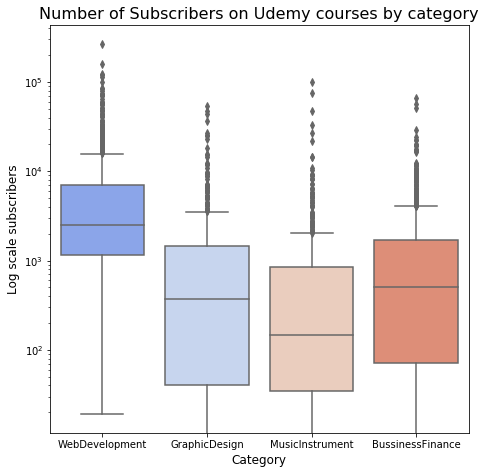

In [31]:
_ = plt.figure(figsize=(7.5, 7.5))
_ = plt.yscale('log')
_ = sns.boxplot(x='category', y='numSubscribers', data=df_courses, palette='coolwarm')
_ = plt.xlabel('Category', size=12)
_ = plt.ylabel('Log scale subscribers', size=12)
_ = plt.title('Number of Subscribers on Udemy courses by category', size=16)

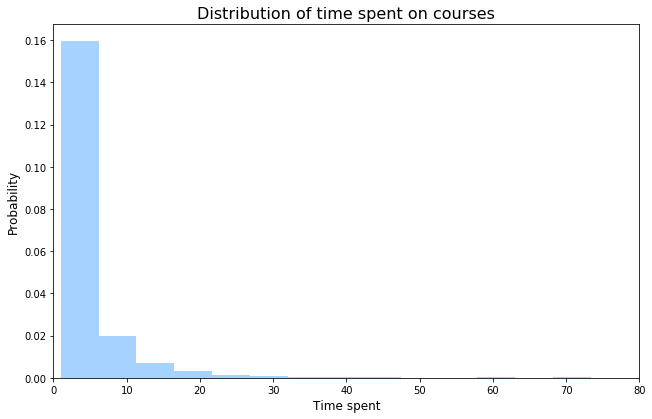

In [32]:
_ = plt.figure(figsize=(10.5, 6.5))
_ = sns.distplot(df_courses.timeSpent.dropna(), 
                 bins=15, kde=False, norm_hist=True,
                 color='dodgerblue')
_ = plt.xlabel('Time spent', size=12)
_ = plt.ylabel('Probability', size=12)
_ = plt.title('Distribution of time spent on courses', size=16)
_ = plt.xlim(0, 80)

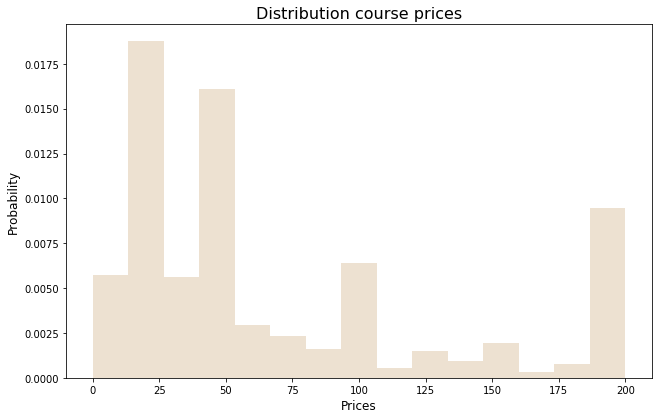

In [33]:
_ = plt.figure(figsize=(10.5, 6.5))
_ = sns.distplot(df_courses.price, kde=False, norm_hist=True, color='tan', bins=15)
_ = plt.xlabel('Prices', size=12)
_ = plt.ylabel('Probability', size=12)
_ = plt.title('Distribution course prices', size=16)

In [34]:
df_courses['publishedMonthYear'] = pd.to_datetime(df_courses['publishDate']).dt.to_period('M').values.astype('datetime64[M]')
df_courses.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,category,timeSpent,publishDate,level,paidBool,publishedMonthYear
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,WebDevelopment,4.0,2013-01-03,All Levels,True,2013-01-01
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50.0,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,WebDevelopment,12.5,2012-06-18,All Levels,True,2012-06-01
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50.0,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,WebDevelopment,4.5,2016-06-30,All Levels,True,2016-06-01
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60.0,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,WebDevelopment,15.5,2014-06-17,Intermediate Level,True,2014-06-01
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20.0,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,WebDevelopment,5.5,2015-10-17,Beginner Level,True,2015-10-01


In [35]:
totalPublishMonthYear = df_courses.groupby(['category', 'publishedMonthYear']).count()
totalPublishMonthYear.reset_index(inplace=True)

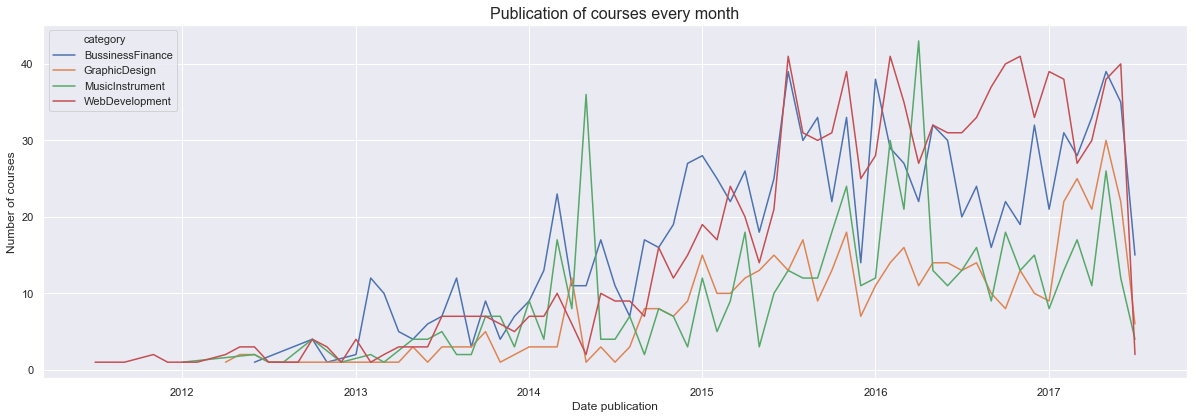

In [36]:
_ = sns.set(style="darkgrid")
_ = plt.figure(figsize=(20.5, 6.5))
_ = sns.lineplot(x='publishedMonthYear', y='id', 
                 hue='category',
                 data=totalPublishMonthYear)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Publication of courses every month', size=16)
_ = plt.xlabel('Date publication', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.legend(loc='upper left')

In [37]:
totalPublishMonthYear['rollingSum'] = totalPublishMonthYear.id.expanding(3).sum()

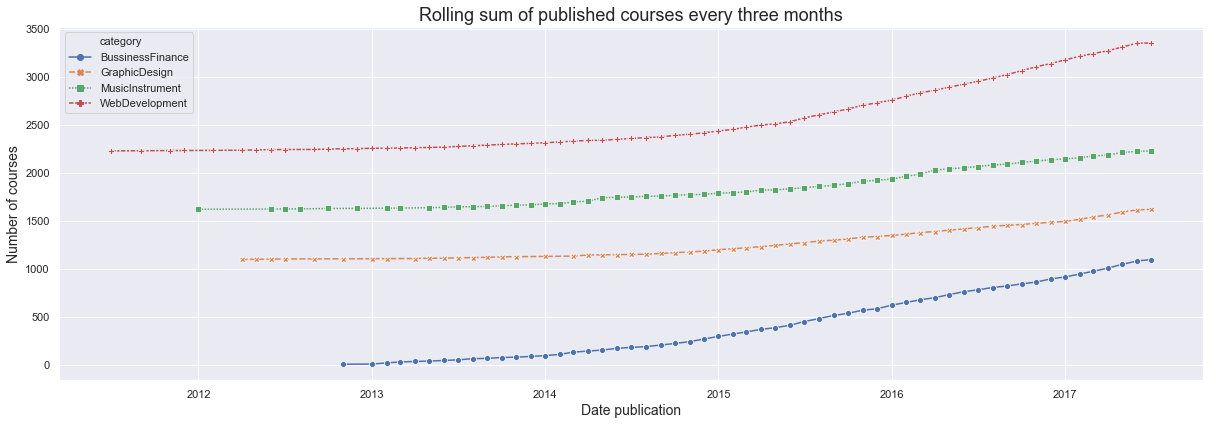

In [38]:
_ = sns.set(style="darkgrid")
_ = plt.figure(figsize=(20.5, 6.5))
_ = sns.lineplot(y='rollingSum', x='publishedMonthYear', 
                 hue='category', style='category', markers=True,
                 data=totalPublishMonthYear)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Rolling sum of published courses every three months', size=18)
_ = plt.xlabel('Date publication', size=14)
_ = plt.ylabel('Number of courses', size=14)
_ = plt.legend(loc='upper left')

In [39]:
totalPublishMonthYear['rollingMean'] = totalPublishMonthYear.id.rolling(3).sum()

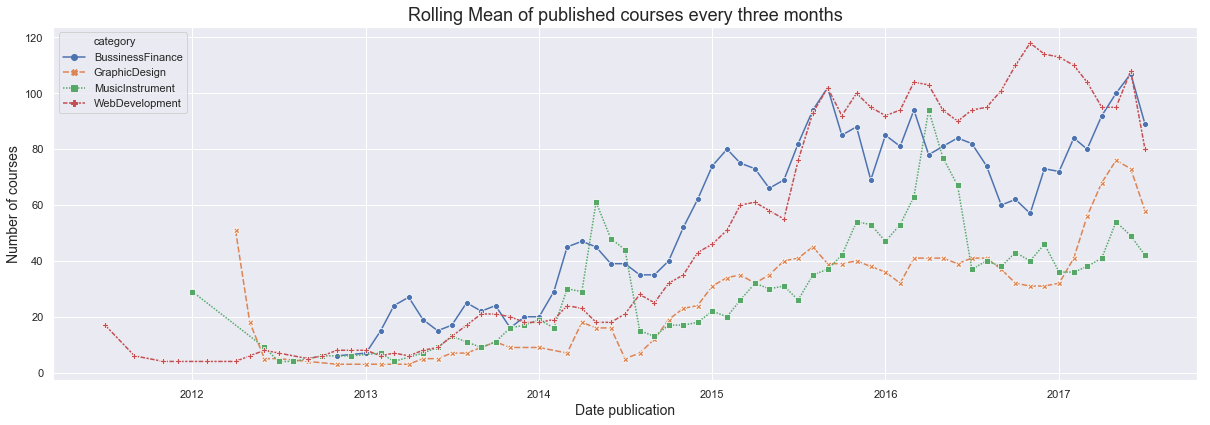

In [40]:
_ = sns.set(style="darkgrid")
_ = plt.figure(figsize=(20.5, 6.5))
_ = sns.lineplot(y='rollingMean', x='publishedMonthYear', 
                 hue='category', style='category', markers=True,
                 data=totalPublishMonthYear)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Rolling Mean of published courses every three months', size=18)
_ = plt.xlabel('Date publication', size=14)
_ = plt.ylabel('Number of courses', size=14)
_ = plt.legend(loc='upper left')

In [41]:
df_courses['publishedYear'] = pd.to_datetime(df_courses['publishDate']).dt.to_period('Y').values.astype('datetime64[Y]')

In [42]:
df_courses['year'] = df_courses['publishedYear'].dt.year

In [43]:
totalPublishYear = df_courses.groupby(['category', 'year']).count()
totalPublishYear.reset_index(inplace=True)

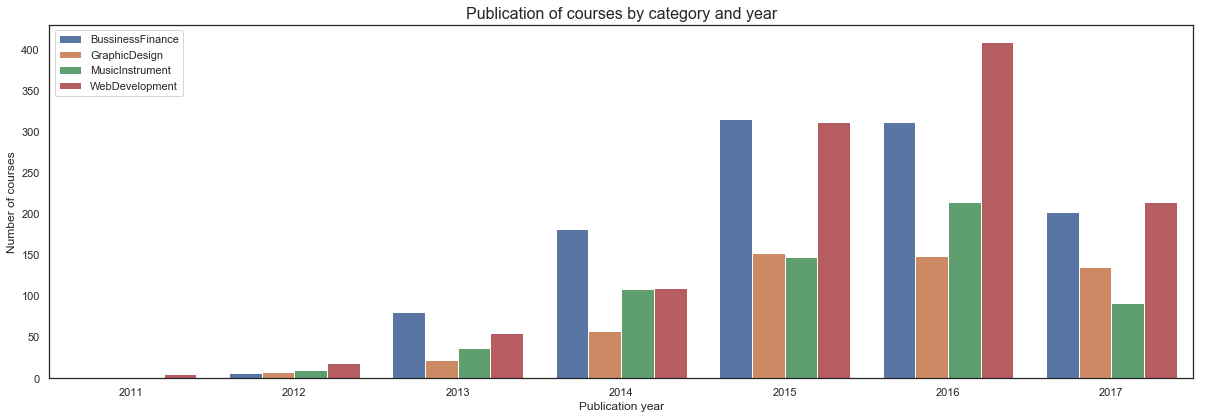

In [44]:
_ = sns.set(style="white")
_ = plt.figure(figsize=(20.5, 6.5))
_ = sns.barplot(x='year', y='id', hue='category', data=totalPublishYear)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.title('Publication of courses by category and year', size=16)
_ = plt.xlabel('Publication year', size=12)
_ = plt.ylabel('Number of courses', size=12)
_ = plt.legend(loc='upper left')